# Reservations and stays in the hotels of Lugano

## Auxiliars

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "../data/city_of_lugano/demographics/"

In [22]:
def read_quarterly_data(file_name):
    dfs = []
    for year in np.arange(2008, 2019):
        for quarter in np.arange(1, 5):
            df = pd.read_json(path+"{0}/{1}/".format(year, quarter)+file_name+'.json')
            df['year'] = year
            df['quarter'] = quarter
            df['yq'] = pd.datetime(year,quarter*3-2,1)
            dfs.append(df)

    df = pd.concat(dfs)
    return df

## Analysis

In [23]:
df = pd.read_csv("../data/h_benchmark/Lugano-prenotazioniv2.csv", sep=';', dtype=str)

df.columns = [
    "id",
    "date-arrived",
    "date-left",
    "duration",
    "date-creation",
    "date-cancellation",
    "num-reserved-rooms",
    "num-guests",
    "overall-revenue",
    "rooms-revenue",
    "room-type",
    "state",
    "treatment",
    "channel",
    "market",
    "nationatily"
]

tra = [
    ("gen","1"), ("feb","2"), ("mar","3"), ("apr","4"), ("mag","5"), ("giu","6"), 
    ("lug","7"), ("ago","8"), ("set","9"), ("ott","10"), ("nov","11"), ("dic","12"),
]

for dates in ['date-arrived', 'date-left']:
    for tr in tra:
        df[dates] = df[dates].apply(lambda x : x.replace(*tr))
    df[dates] = pd.to_datetime(df[dates], format='%d-%m-%y')
        
df.head(5)

,id,date-arrived,date-left,duration,date-creation,date-cancellation,num-reserved-rooms,num-guests,overall-revenue,rooms-revenue,room-type,state,treatment,channel,market,nationatily
0,43469,2019-01-04,2019-01-07,3,04-gen-19,NaN,1,2,0,0,JS - TVL,Cancellata,Bed & Breakfast,Sito Web,Gruppi Leisure,Italia
1,43623,2019-06-06,2019-06-16,10,07-giu-19,NaN,1,2,0,0,JS - TVL,Cancellata,Bed & Breakfast,Sito Web,Gruppi Leisure,Non Specificato
2,43505,2019-02-09,2019-02-11,2,10-feb-19,NaN,1,1,0,0,JS - TVL,Cancellata,Bed & Breakfast,Sito Web,Gruppi Leisure,Non Specificato
3,43512,2019-02-16,2019-02-18,2,16-feb-19,NaN,1,2,0,0,SUI- TVL,Cancellata,Bed & Breakfast,Sito Web,Gruppi Business,Svizzera
4,43601,2019-05-16,2019-05-19,3,16-mag-19,NaN,1,2,0,0,JS - TVL,Cancellata,Bed & Breakfast,Sito Web,Gruppi Business,Svizzera


In [28]:
df['yq'] = df['date-arrived'].dt.year.astype(str) + df['date-arrived'].dt.quarter.astype(str)

In [37]:
from pandas.tseries.offsets import *

In [42]:
df = df.drop_duplicates()
df['yq'] = df['date-arrived'].dt.to_period('Q').dt.to_timestamp('Q')
df['yq'] = df['yq'] - BMonthBegin(3)

/Users/abramo/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimes.py:840: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


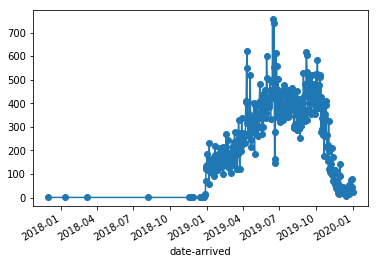

In [44]:
arrivals = df.groupby(['date-arrived']).size()
arrivals.plot(marker='o');

In [45]:
pd.read_json("/Users/abramo/Desktop/usi_hackathon_data/data/city_of_lugano/parking/posteggi.json")

,Capacita,DataNome,Disponibilita,OccupazionePerc,Ora,Parcheggio,data
0,246,17-Giu-2019,62,74.80,11:00:00,Centro Est - Piazza Castello,2019-06-17
1,234,17-Giu-2019,121,48.29,11:00:00,Centro Sud - LAC,2019-06-17
2,200,17-Giu-2019,33,83.50,11:00:00,Centro - Motta,2019-06-17
3,410,17-Giu-2019,230,43.90,11:00:00,Cornaredo - Resega,2019-06-17
4,96,17-Giu-2019,69,28.13,11:00:00,Centro - Bettydo,2019-06-17
5,81,17-Giu-2019,29,64.20,11:00:00,Stazione - Ex Pestalozzi,2019-06-17
6,440,17-Giu-2019,377,14.32,23:00:00,Centro - Balestra,2019-06-17
7,153,17-Giu-2019,46,69.93,23:00:00,Cornaredo - Termica,2019-06-17
8,109,17-Giu-2019,80,26.61,23:00:00,Cornaredo - Stadio Est,2019-06-17
9,170,17-Giu-2019,87,48.82,23:00:00,Centro Est - Campo Marzio,2019-06-17


In [46]:
pd.read_json("/Users/abramo/Desktop/usi_hackathon_data/data/city_of_lugano/shops_and_tills/transactions.json")

,bookkeeping_date,id,operator_id,shop_id,till_id,total_amount,trans_date
0,2018-01-01T00:00:00,2085118,150,24,53,25.0,2018-01-01T14:00:13
1,2018-01-01T00:00:00,2085119,149,24,54,20.0,2018-01-01T14:00:50
2,2018-01-01T00:00:00,2085120,149,24,54,10.0,2018-01-01T14:02:19
3,2018-01-01T00:00:00,2085121,150,24,53,20.0,2018-01-01T14:02:39
4,2018-01-01T00:00:00,2085122,149,24,54,0.0,2018-01-01T14:03:27
5,2018-01-01T00:00:00,2085123,150,24,53,45.0,2018-01-01T14:05:35
6,2018-01-01T00:00:00,2085124,149,24,54,30.0,2018-01-01T14:06:12
7,2018-01-01T00:00:00,2085125,150,24,53,0.0,2018-01-01T14:06:27
8,2018-01-01T00:00:00,2085126,150,24,53,15.0,2018-01-01T14:07:45
9,2018-01-01T00:00:00,2085127,149,24,54,30.0,2018-01-01T14:11:37
